In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models

In [40]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [41]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [42]:
train_labels, test_labels = keras.utils.to_categorical(train_labels), keras.utils.to_categorical(test_labels)

In [43]:
base_model = keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])

In [44]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('best.keras', save_best_only = True)
early_stopping = EarlyStopping(patience=10, restore_best_weights = True)

In [46]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, callbacks=[checkpoint_cb, early_stopping])

Epoch 1/30
1563/1563 [==============================] - 27s 15ms/step - loss: 2.3507 - accuracy: 0.1050 - val_loss: 2.3065 - val_accuracy: 0.1005
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3034 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
1563/1563 [==============================] - 23s 14ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/30
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
1563/1563 [==============================] - 23s 14ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
1563/1563 [==============================] - 23s 15ms/step - loss: 2.3028 - accuracy: 0.1024 - val_loss: 2.3026 -

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [50]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [52]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input

In [53]:
model = Sequential([
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [54]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [57]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, verbose = 2)

Epoch 1/10
1875/1875 - 14s - loss: 0.1423 - accuracy: 0.9560 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 - 4s - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0375 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 - 4s - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 - 4s - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0326 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 - 4s - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 - 4s - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 - 4s - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0438 - val_accuracy: 0.9869
Epoch 8/10
1875/1875 - 4s - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0360 - val_accuracy: 0.9918
Epoch 9/10
1875/1875 - 4s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0326 - val_accuracy: 0.9917
Epoch 10/10
1875/1875 - 4s - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0327 -

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 0s - loss: 0.0327 - accuracy: 0.9915
test_loss: 0.032714299857616425
test_accuracy: 0.9915000200271606


In [60]:
import numpy as np

In [61]:
predicted_result = model.predict(X_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [8.2472396e-15 3.3347630e-10 2.4742700e-14 3.2092081e-13 6.2792928e-15
 3.4443951e-14 2.6858505e-18 1.0000000e+00 2.7754372e-13 2.9563263e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


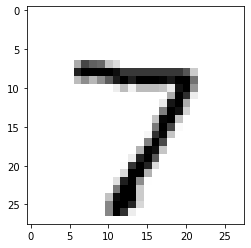

In [64]:
import matplotlib.pyplot as plt

plt.imshow(X_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.2675758e-13 1.1157199e-05 3.4369799e-07 1.0552351e-10 9.0744250e-02
 1.7148397e-09 5.7417920e-10 9.0924394e-01 2.4041158e-08 3.1532824e-07]
라벨: 4, 예측결과: 7


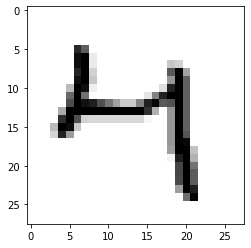

예측확률분포: [3.1387682e-07 3.6141645e-07 1.5898162e-07 4.4617409e-04 5.3627018e-06
 6.7660592e-05 1.1204843e-07 1.4189392e-06 5.5706435e-01 4.4241413e-01]
라벨: 9, 예측결과: 8


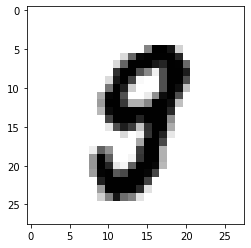

예측확률분포: [7.8462231e-13 7.5563129e-09 2.0561992e-01 1.1510436e-06 1.8502854e-09
 3.1798682e-13 9.1054646e-12 7.9437894e-01 6.8012422e-09 7.4506391e-12]
라벨: 2, 예측결과: 7


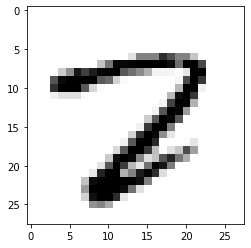

예측확률분포: [8.7227303e-01 8.9600326e-06 3.2173704e-02 2.4143997e-06 1.5153402e-02
 1.9602722e-04 1.7946634e-03 4.0765171e-04 1.9859057e-02 5.8131158e-02]
라벨: 9, 예측결과: 0


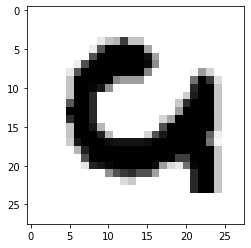

예측확률분포: [1.6539749e-05 9.3458130e-10 1.5824505e-11 2.0665447e-10 7.4448808e-10
 1.6592026e-01 8.3397382e-01 1.2099074e-11 8.9287860e-05 2.2631315e-07]
라벨: 5, 예측결과: 6


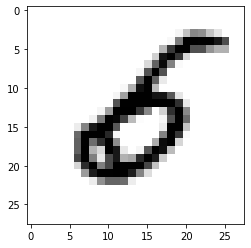

In [66]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(X_test[n], cmap=plt.cm.binary)
    plt.show()

In [71]:
# 디렉토리 만들기
!mkdir -p ~/contents/rock_scissor_paper/scissor
!mkdir -p ~/contents/rock_scissor_paper/rock
!mkdir -p ~/contents/rock_scissor_paper/paper

# 디렉토리 내용 확인
!ls -l ~/contents/rock_scissor_paper

total 3
drwxr-xr-x 2 jovyan users 4096 Aug  8 03:52 paper
drwxr-xr-x 2 jovyan users 4096 Aug  8 03:52 rock
drwxr-xr-x 2 jovyan users 4096 Aug  8 03:52 scissor


In [197]:
!ls -l ~/data.zip

ls: cannot access '/home/jovyan/data.zip': No such file or directory


In [198]:
!pwd

/home/jovyan


In [199]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/contents/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

530  images to be resized.
530  images resized.
가위 이미지 resize 완료!


In [200]:
image_dir_path = os.getenv("HOME") + "/contents/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")
image_dir_path = os.getenv("HOME") + "/contents/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

1142  images to be resized.
1142  images resized.
바위 이미지 resize 완료!
738  images to be resized.
738  images resized.
보 이미지 resize 완료!


In [218]:
def load_data(img_path, number_of_data=2410):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(X)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/contents/rock_scissor_paper"
(X, y) = load_data(image_dir_path)

학습데이터(X)의 이미지 개수는 2410 입니다.


In [219]:
X.shape, y.shape

((2410, 28, 28, 3), (2410,))

In [220]:
X.dtype

dtype('int32')

In [221]:
X = X /255.0

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

In [224]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1446, 28, 28, 3), (964, 28, 28, 3), (1446,), (964,))

In [225]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [226]:
checkpoint_cb = ModelCheckpoint(filepath = 'best.keras', monitor = 'val_loss', verbose = 1, save_best_only=True, mode='min', save_freq='epoch')
earlystopping_cb = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'min', restore_best_weights=True)

In [243]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    
    Dense(units=32, activation='relu'),
    
    Dense(units=3, activation='softmax')
])

In [244]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [245]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200, verbose = 1, batch_size = 16, callbacks = [checkpoint_cb, earlystopping_cb])

Epoch 1/200
91/91 [==============================] - 1s 6ms/step - loss: 1.0627 - accuracy: 0.4532 - val_loss: 1.0065 - val_accuracy: 0.4730

Epoch 00001: val_loss did not improve from 0.04763
Epoch 2/200
91/91 [==============================] - 0s 4ms/step - loss: 0.9450 - accuracy: 0.5513 - val_loss: 0.5711 - val_accuracy: 0.7656

Epoch 00002: val_loss did not improve from 0.04763
Epoch 3/200
91/91 [==============================] - 0s 5ms/step - loss: 0.5392 - accuracy: 0.7719 - val_loss: 0.2444 - val_accuracy: 0.9149

Epoch 00003: val_loss did not improve from 0.04763
Epoch 4/200
91/91 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.9005 - val_loss: 0.2237 - val_accuracy: 0.8942

Epoch 00004: val_loss did not improve from 0.04763
Epoch 5/200
91/91 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.9163 - val_loss: 0.1212 - val_accuracy: 0.9388

Epoch 00005: val_loss did not improve from 0.04763
Epoch 6/200
91/91 [================

In [246]:
print("X_train_norm shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test_norm shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_norm shape: (1446, 28, 28, 3)
y_train shape: (1446,)
X_test_norm shape: (964, 28, 28, 3)
y_test shape: (964,)


In [247]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

31/31 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9917
Test loss: 0.02804524265229702
Test accuracy: 0.9917012453079224


In [248]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Epoch 1/50
46/46 [==============================] - 1s 18ms/step - loss: 1.2829 - accuracy: 0.4710 - val_loss: 0.9974 - val_accuracy: 0.5581

Epoch 00001: val_loss did not improve from 0.02805
Epoch 2/50
46/46 [==============================] - 1s 18ms/step - loss: 1.0204 - accuracy: 0.5131 - val_loss: 0.8876 - val_accuracy: 0.5799

Epoch 00002: val_loss did not improve from 0.02805
Epoch 3/50
46/46 [==============================] - 1s 18ms/step - loss: 0.9693 - accuracy: 0.5546 - val_loss: 0.7388 - val_accuracy: 0.6670

Epoch 00003: val_loss did not improve from 0.02805
Epoch 4/50
46/46 [==============================] - 1s 18ms/step - loss: 0.8994 - accuracy: 0.5871 - val_loss: 0.6715 - val_accuracy: 0.6525

Epoch 00004: val_loss did not improve from 0.02805
Epoch 5/50
46/46 [==============================] - 1s 18ms/step - loss: 0.8457 - accuracy: 0.6176 - val_loss: 0.5970 - val_accuracy: 0.7459

Epoch 00005: val_loss did not improve from 0.02805
Epoch 6/50
46/46 [=================

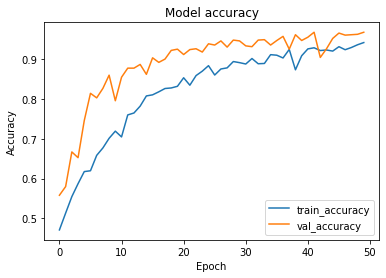

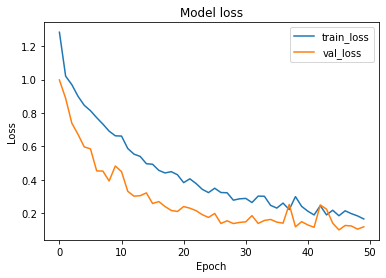

31/31 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.9678
Test loss: 0.11905937641859055
Test accuracy: 0.9678423404693604


In [249]:
# 데이터 증강 적용
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# 모델 학습
history = model.fit(train_generator, validation_data=(X_test, y_test), epochs=50, verbose=1, callbacks=[checkpoint_cb, earlystopping_cb])

# 학습 결과 시각화
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

In [301]:
# 데이터 로드 함수
def load_data(data_path):
    imgs = []
    labels = []
    for label, folder in enumerate(['scissor', 'rock', 'paper']):
        folder_path = os.path.join(data_path, folder)
        for file in os.listdir(folder_path):
            if file.endswith('.jpg'):
                img = Image.open(os.path.join(folder_path, file))
                img = img.resize((32, 32))  # 이미지 크기를 32x32로 맞춤
                img = np.array(img)
                imgs.append(img)
                labels.append(label)
    return np.array(imgs), np.array(labels)

# 데이터 로드
new_data_path = os.path.expanduser('~/contents/rock_scissor_paper')
X2, y2 = load_data(new_data_path)

In [302]:
X2.shape

(2410, 32, 32, 3)

In [303]:
y2.shape

(2410,)

In [304]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [305]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1687, 32, 32, 3), (1687,), (723, 32, 32, 3), (723,))

In [306]:
X_train2 = X_train2 / 255.0
X_test2 = X_test2 / 255.0

In [307]:
from tensorflow.keras.applications import VGG16

In [312]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (32, 32, 3))
base_model.training = False

model2 = Sequential([
    base_model,
    Dense(100, activation = 'relu'),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [313]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1687, 32, 32, 3), (1687,), (723, 32, 32, 3), (723,))

In [ ]:
history2 = model2.fit(X_train2, y_train2, validation_data = (X_test2, y_test2), epochs = 100)

Epoch 1/100
53/53 [==============================] - ETA: 0s - loss: 1.2437 - accuracy: 0.3717

In [ ]:
# 정확도 그래프
plt.plot(history.history2['accuracy'], label='train_accuracy')
plt.plot(history.history2['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(history.history2['loss'], label='train_loss')
plt.plot(history.history2['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")